In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [66]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

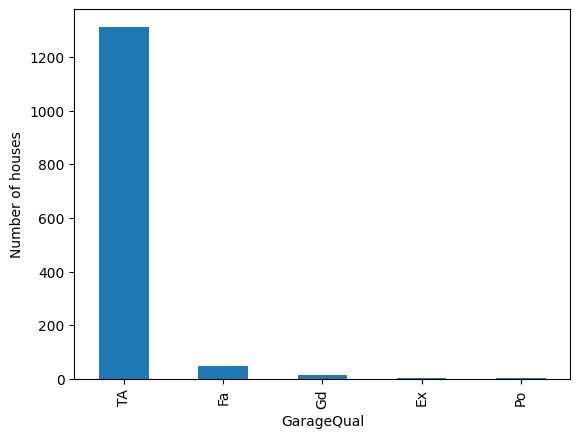

In [67]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [68]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

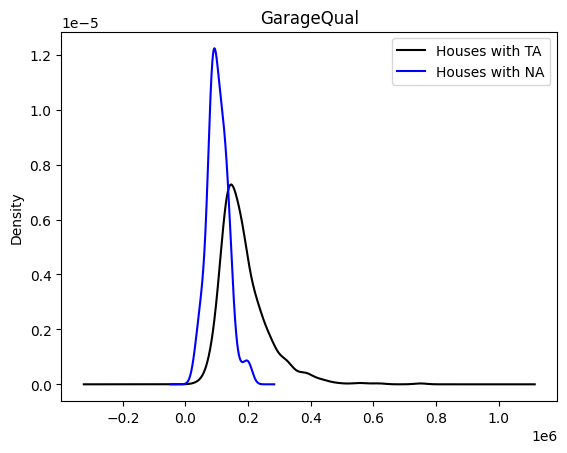

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='black')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax =ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')
plt.title('GarageQual')

In [73]:
df[df['GarageQual'].isnull()]['SalePrice']

39       82000
48      113000
78      136500
88       85000
89      123600
         ...  
1349    122000
1407    112000
1449     92000
1450    136000
1453     84500
Name: SalePrice, Length: 81, dtype: int64

In [74]:
df[df['GarageQual']=='TA']['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

In [37]:
temp = df[df['GarageQual']=='TA']['SalePrice']
temp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1392, dtype: int64

In [35]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

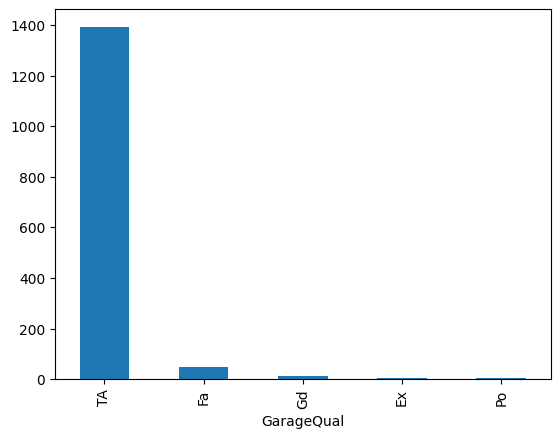

In [36]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Original vs Impuation')

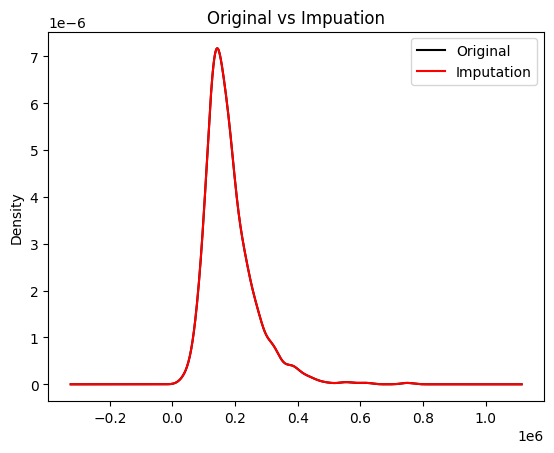

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original
temp.plot(kind='kde', ax = ax, color='black')

#distribution of variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color= 'red')

#add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputation']
ax.legend(lines, labels, loc = 'best')
plt.title('Original vs Impuation')

<Axes: xlabel='FireplaceQu'>

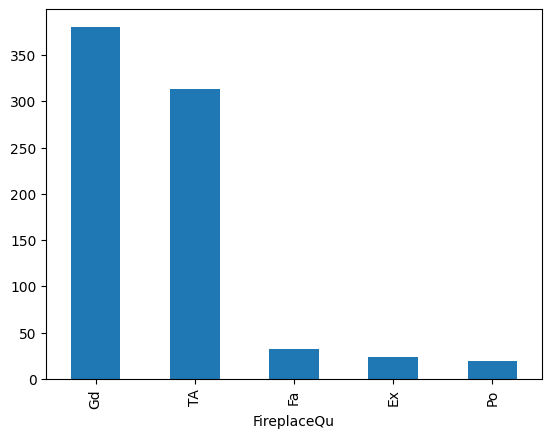

In [40]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [41]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [43]:
df['FireplaceQu'].isnull().mean()*100

np.float64(47.26027397260274)

In [44]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


Text(0.5, 1.0, 'Gd Houses vs Null Value Houses')

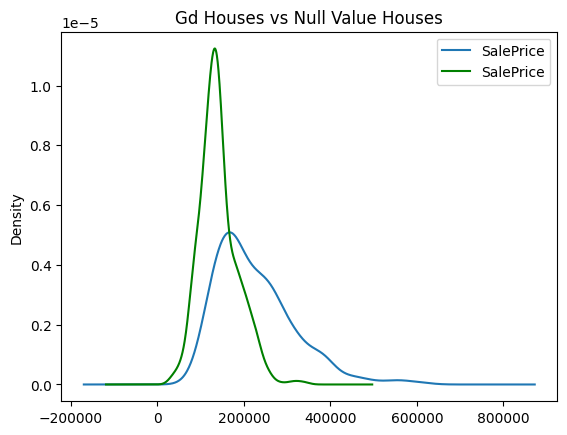

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses With Gd', 'Houses with NA']
ax.legend()

plt.title('Gd Houses vs Null Value Houses')

In [48]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [50]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

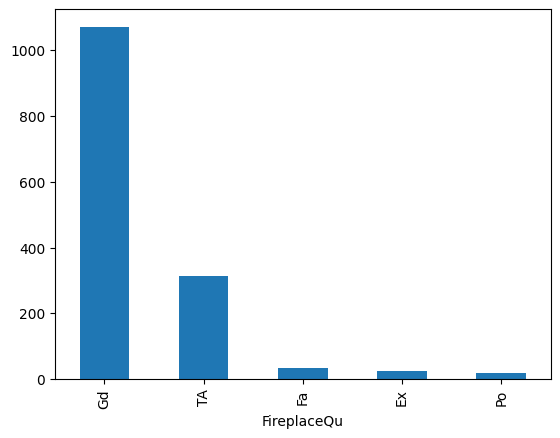

In [52]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Original vs Imputation ')

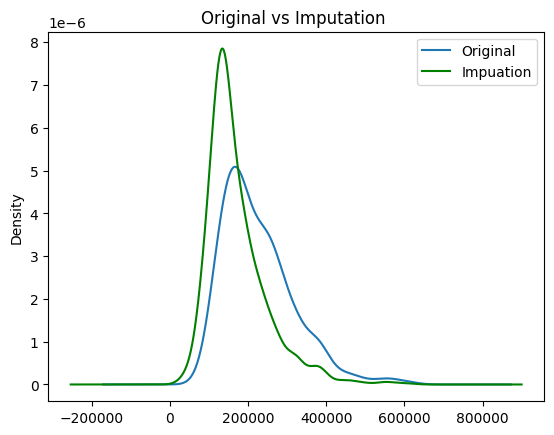

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original
temp.plot(kind='kde', ax=ax)

#After imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax = ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Impuation']
ax.legend(lines, labels, loc = 'best')

plt.title('Original vs Imputation ')

#### Using Sklearn

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
imputer = SimpleImputer(strategy='most_frequent')

In [80]:
X_train_trf = imputer.fit_transform(X_train)
X_test_trf = imputer.transform(X_test)

In [81]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)